In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
df = pd.read_csv("insurance_part2_data.csv")

In [96]:
df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [97]:
df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [99]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [100]:
df.duplicated

<bound method DataFrame.duplicated of       Age Agency_Code           Type Claimed  Commision Channel  Duration  \
0      48         C2B       Airlines      No       0.70  Online         7   
1      36         EPX  Travel Agency      No       0.00  Online        34   
2      39         CWT  Travel Agency      No       5.94  Online         3   
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
...   ...         ...            ...     ...        ...     ...       ...   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Desti

In [101]:
df['Duration'].unique()

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

In [102]:
df.loc[df['Duration'] == 0 ] 

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [103]:
df.loc[df['Duration'] == -1 ] 

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [104]:
df.drop(df.loc[df['Duration'] == -1 ].index,inplace=True )
df.drop(df.loc[df['Duration'] == 0].index,inplace=True )

In [105]:
df.loc[df['Duration'] == -1 ] 

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [106]:
df.loc[df['Duration'] == 0 ] 

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [107]:
df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


In [108]:
df['Destination'].unique()

array(['ASIA', 'Americas', 'EUROPE'], dtype=object)

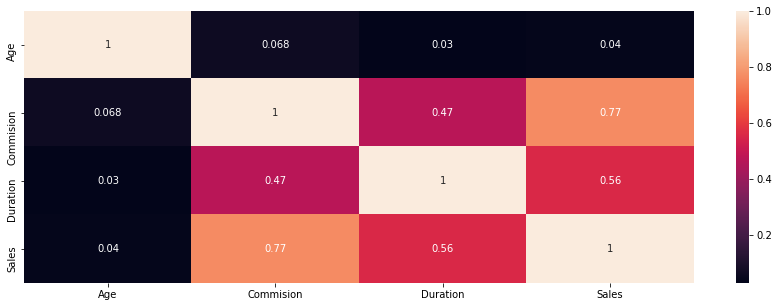

In [109]:
plt.figure(figsize =(15,5))
sns.heatmap(df.corr(), annot=True)

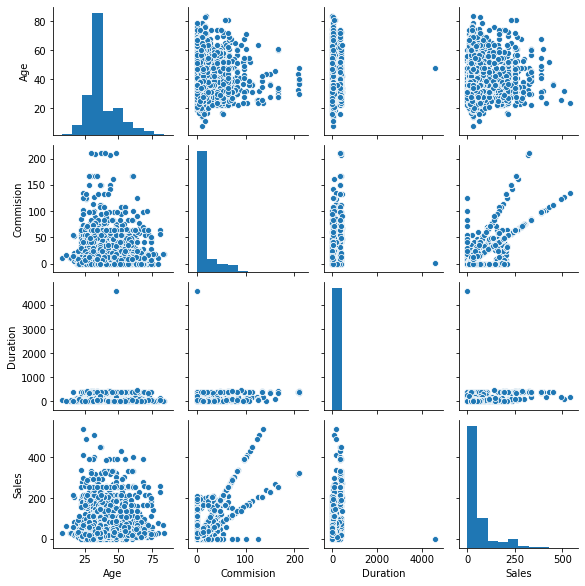

In [110]:
sns.pairplot(df,height =2)

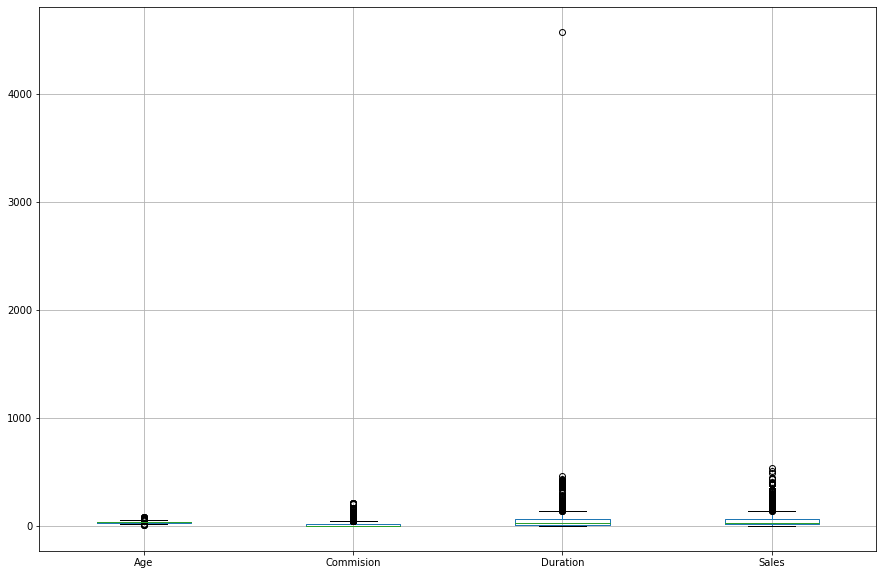

In [111]:
df.boxplot(figsize=(15,10))

In [112]:
df.Claimed.value_counts(normalize=True)

No     0.691692
Yes    0.308308
Name: Claimed, dtype: float64

In [113]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [114]:
df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28,1,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0,0.00,1,54,28.00,2,0
2998,34,0,0,1,7.64,1,39,30.55,0,0


In [115]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


Train Test Data Split

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [117]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2097, 9)
X_test (900, 9)
train_labels (2097,)
test_labels (900,)


In [118]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# CART Decision Tree Classifier

In [119]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3,4,5,100],
    'min_samples_leaf': [40,50,60], 
    'min_samples_split': [2,3,4],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [120]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=1)

In [121]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [122]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.643913
Sales         0.215134
Commision     0.083764
Product Name  0.030316
Duration      0.022633
Age           0.004240
Type          0.000000
Channel       0.000000
Destination   0.000000


In [123]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

AUC: 0.817


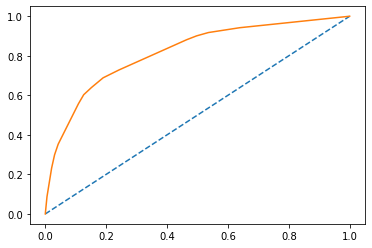

In [124]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.801


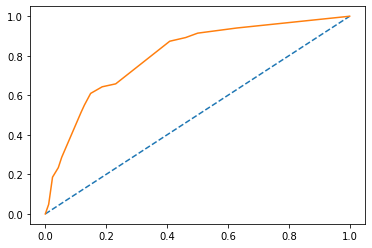

In [125]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [126]:
confusion_matrix(train_labels, ytrain_predict)

array([[1260,  182],
       [ 260,  395]], dtype=int64)

In [127]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7892226990939437

In [128]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1442
           1       0.68      0.60      0.64       655

    accuracy                           0.79      2097
   macro avg       0.76      0.74      0.75      2097
weighted avg       0.78      0.79      0.79      2097



In [129]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df_stat=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df_stat.loc["1"][2],2)
cart_train_recall=round(df_stat.loc["1"][1],2)
cart_train_precision=round(df_stat.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.68
cart_train_recall  0.6
cart_train_f1  0.64


In [130]:
confusion_matrix(test_labels, ytest_predict)

array([[550,  81],
       [121, 148]], dtype=int64)

In [131]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7755555555555556

In [132]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       631
           1       0.65      0.55      0.59       269

    accuracy                           0.78       900
   macro avg       0.73      0.71      0.72       900
weighted avg       0.77      0.78      0.77       900



In [133]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df_stat=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df_stat.loc["1"][0],2)
cart_test_recall=round(df_stat.loc["1"][1],2)
cart_test_f1=round(df_stat.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.65
cart_test_recall  0.55
cart_test_f1  0.59


# Random Forest Classifier

In [134]:
param_grid = {
    'max_depth': [20],#10,30,40
    'max_features': [5],#4,6,7,8],
    'min_samples_leaf': [4],#3,5,10,15,50,100
    'min_samples_split': [70],#50,60,80
    'n_estimators': [30],#,15,20,35,40,50,100,150#200,300
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [135]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [20], 'max_features': [5],
                         'min_samples_leaf': [4], 'min_samples_split': [70],
                         'n_estimators': [30]})

In [136]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 70,
 'n_estimators': 30}

In [137]:
best_grid = grid_search.best_estimator_

In [138]:
best_grid

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=4,
                       min_samples_split=70, n_estimators=30, random_state=1)

In [139]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [140]:
confusion_matrix(train_labels,ytrain_predict)

array([[1314,  128],
       [ 257,  398]], dtype=int64)

In [141]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8164043872198379

In [142]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1442
           1       0.76      0.61      0.67       655

    accuracy                           0.82      2097
   macro avg       0.80      0.76      0.77      2097
weighted avg       0.81      0.82      0.81      2097



Area under Curve is 0.8704005251400198


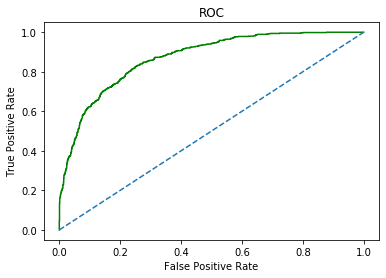

In [143]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [144]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df_stat=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df_stat.loc["1"][0],2)
rf_train_recall=round(df_stat.loc["1"][1],2)
rf_train_f1=round(df_stat.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.76
rf_train_recall  0.61
rf_train_f1  0.67


In [145]:
confusion_matrix(test_labels,ytest_predict)

array([[566,  65],
       [133, 136]], dtype=int64)

In [146]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.78

In [147]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       631
           1       0.68      0.51      0.58       269

    accuracy                           0.78       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.77      0.78      0.77       900



In [148]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df_stat=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df_stat.loc["1"][0],2)
rf_test_recall=round(df_stat.loc["1"][1],2)
rf_test_f1=round(df_stat.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)
df

rf_test_precision  0.68
rf_test_recall  0.51
rf_test_f1  0.58


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...
2995,28,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0.00,1,54,28.00,2,0
2998,34,0,0,7.64,1,39,30.55,0,0


Area under Curve is 0.8280536588527092


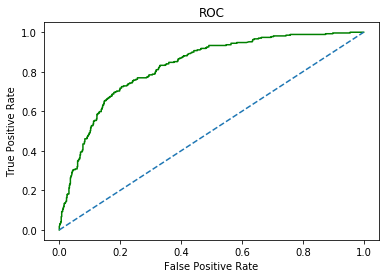

In [149]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [150]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.307870
Sales         0.179007
Product Name  0.155509
Commision     0.112633
Duration      0.090710
Type          0.083291
Age           0.058356
Destination   0.010393
Channel       0.002231


# Neural Network Classifier

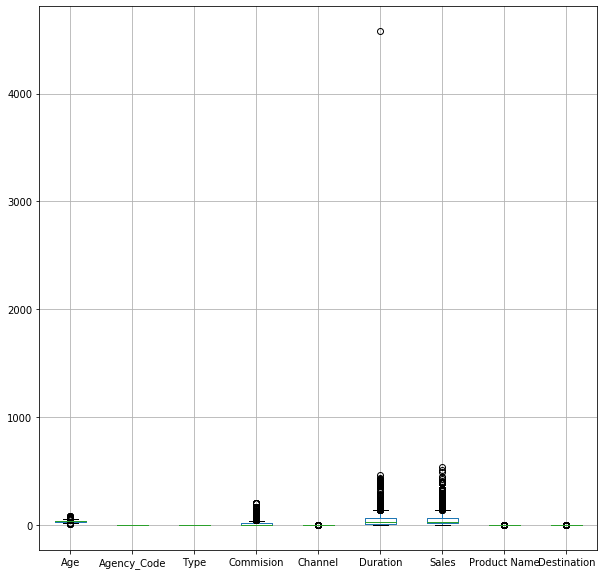

In [151]:
df.boxplot(figsize=(10,10))

In [152]:
df

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...
2995,28,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0.00,1,54,28.00,2,0
2998,34,0,0,7.64,1,39,30.55,0,0


In [153]:
df[df['Age']==df['Age'].min()]

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1558,8,1,1,9.57,0,50,29.0,2,0


Treating Outliers

In [154]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [155]:
lrcom,urcom=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>urcom,urcom,df['Commision'])
df['Commision']=np.where(df['Commision']<lrcom,lrcom,df['Commision'])

lrdur,urdur=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>urdur,urdur,df['Duration'])
df['Duration']=np.where(df['Duration']<lrdur,lrdur,df['Duration'])

lrsa,ursa=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>ursa,ursa,df['Sales'])
df['Sales']=np.where(df['Sales']<lrsa,lrsa,df['Sales'])

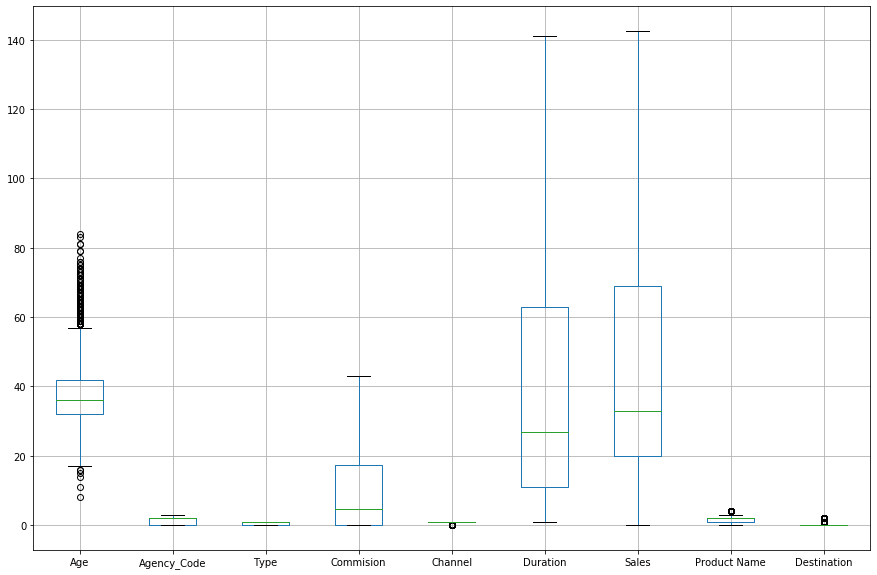

In [156]:
df.boxplot(figsize=(15,10))

In [157]:
Q1,Q3=df['Age'].quantile([0.25,0.75])
IQR=Q3-Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
df[df['Age']<lower_range]

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1273,14,1,1,10.500,0,31.0,30.0,2,0
1558,8,1,1,9.570,0,50.0,29.0,2,0
1673,16,0,0,43.075,1,141.0,142.5,4,0
1940,15,1,1,10.500,0,53.0,30.0,2,0
2724,11,0,0,15.750,1,27.0,63.0,4,0
2987,16,0,0,15.000,1,15.0,60.0,0,0


In [158]:
sc = StandardScaler()

In [159]:
x_train = sc.fit_transform(X_train)

In [160]:
x_train

array([[ 0.97618306, -0.28968173,  0.78220013, ...,  0.4549692 ,
        -1.35565086,  2.94750146],
       [-0.00411379,  1.74878331, -1.27844519, ..., -0.44167268,
        -1.35565086, -0.44394466],
       [-0.78835126, -0.28968173,  0.78220013, ..., -0.58237649,
         0.24187645,  2.94750146],
       ...,
       [-0.20017316,  0.72955079,  0.78220013, ...,  0.01354551,
         0.24187645, -0.44394466],
       [ 0.58406432,  1.74878331, -1.27844519, ..., -0.60720657,
        -1.35565086, -0.44394466],
       [-0.20017316, -1.30891424, -1.27844519, ..., -0.54513136,
         1.83940377, -0.44394466]])

In [161]:
x_test = sc.transform(X_test)

In [162]:
x_test

array([[-0.20017316,  0.72955079,  0.78220013, ...,  0.19287388,
        -0.5568872 ,  1.2517784 ],
       [-0.20017316,  0.72955079,  0.78220013, ..., -0.40028921,
        -0.5568872 , -0.44394466],
       [-0.29820284,  0.72955079,  0.78220013, ..., -0.09681042,
        -0.5568872 ,  2.94750146],
       ...,
       [ 1.46633148, -1.30891424, -1.27844519, ..., -0.54513136,
         1.83940377, -0.44394466],
       [-0.20017316,  0.72955079,  0.78220013, ..., -0.15198838,
         0.24187645, -0.44394466],
       [-0.98441063, -1.30891424, -1.27844519, ...,  1.73578765,
         1.83940377, -0.44394466]])

In [163]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', random_state=21,tol=0.01)

In [164]:
param_grid = {
    'hidden_layer_sizes': [200],#50,100,150,250
    'max_iter': [50], #5000,2500,3000,2000,1000,1500,500,600
    'solver': ['adam'],#, 'sgd'
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1,verbose=True)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [165]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

Iteration 1, loss = 2.58681754
Iteration 2, loss = 1.04906161
Iteration 3, loss = 0.93537609
Iteration 4, loss = 0.74133877
Iteration 5, loss = 0.63393244
Iteration 6, loss = 0.58083592
Iteration 7, loss = 0.54195973
Iteration 8, loss = 0.53179230
Iteration 9, loss = 0.54246608
Iteration 10, loss = 0.51965216
Iteration 11, loss = 0.51657439
Iteration 12, loss = 0.50292680
Iteration 13, loss = 0.49959496
Iteration 14, loss = 0.49057185
Iteration 15, loss = 0.48585765
Iteration 16, loss = 0.49111667
Iteration 17, loss = 0.50544658
Iteration 18, loss = 0.51698088
Iteration 19, loss = 0.49279453
Iteration 20, loss = 0.47696443
Iteration 21, loss = 0.47195032
Iteration 22, loss = 0.47279034
Iteration 23, loss = 0.48209038
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.56283425
Iteration 2, loss = 1.04881027
Iteration 3, loss = 0.96282510
Iteration 4, loss = 0.76182112
Iteration 5, loss = 0.65291822
Iteration 6, loss = 0.588446

Iteration 1, loss = 2.28575637
Iteration 2, loss = 0.98501119
Iteration 3, loss = 0.83328397
Iteration 4, loss = 0.64532328
Iteration 5, loss = 0.59493341
Iteration 6, loss = 0.55050802
Iteration 7, loss = 0.52767836
Iteration 8, loss = 0.51377765
Iteration 9, loss = 0.51007355
Iteration 10, loss = 0.49858908
Iteration 11, loss = 0.50047419
Iteration 12, loss = 0.50164087
Iteration 13, loss = 0.49424985
Iteration 14, loss = 0.48996607
Iteration 15, loss = 0.48886796
Iteration 16, loss = 0.48062649
Iteration 17, loss = 0.47752577
Iteration 18, loss = 0.48951328
Iteration 19, loss = 0.47571984
Iteration 20, loss = 0.47622820
Iteration 21, loss = 0.47689976
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


{'hidden_layer_sizes': 200, 'max_iter': 50, 'solver': 'adam', 'tol': 0.01}

In [166]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=50, random_state=1, tol=0.01,
              verbose=True)

In [167]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [168]:
confusion_matrix(train_labels,ytrain_predict)

array([[1302,  140],
       [ 312,  343]], dtype=int64)

In [169]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7844539818788746

In [170]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1442
           1       0.71      0.52      0.60       655

    accuracy                           0.78      2097
   macro avg       0.76      0.71      0.73      2097
weighted avg       0.78      0.78      0.77      2097



Area under Curve is 0.8227133646017512


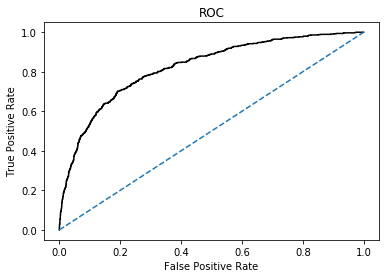

In [171]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [ ]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df_stat=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df_stat.loc["1"][0],2)
nn_train_recall=round(df_stat.loc["1"][1],2)
nn_train_f1=round(df_stat.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)
df_stat

In [173]:
confusion_matrix(test_labels,ytest_predict)

array([[563,  68],
       [145, 124]], dtype=int64)

In [174]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7633333333333333

In [175]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       631
           1       0.65      0.46      0.54       269

    accuracy                           0.76       900
   macro avg       0.72      0.68      0.69       900
weighted avg       0.75      0.76      0.75       900



Area under Curve is 0.7891763236498388


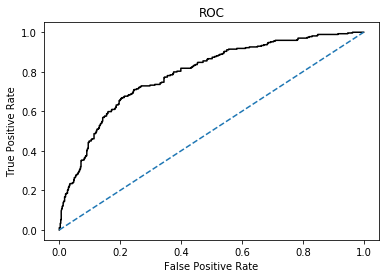

In [176]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [177]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df_stat=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df_stat.loc["1"][0],2)
nn_test_recall=round(df_stat.loc["1"][1],2)
nn_test_f1=round(df_stat.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.65
nn_test_recall  0.46
nn_test_f1  0.54


Comparing all the 3 models

In [178]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.78,0.82,0.78,0.78,0.76
AUC,0.82,0.80,0.87,0.83,0.82,0.79
Recall,0.60,0.55,0.61,0.51,0.52,0.46
Precision,0.68,0.65,0.76,0.68,0.71,0.65
F1 Score,0.64,0.59,0.67,0.58,0.60,0.54


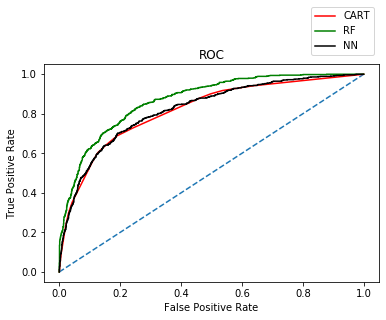

In [179]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

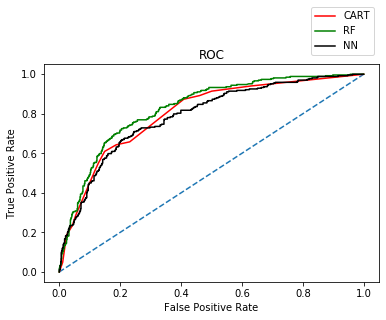

In [180]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')